# 1. Introduction to visualisations

In [9]:
import pandas as pd
import plotly.express as px

This is a layout helper function that is making our plots look a bit nicer, i.e. no grid in the background.

In [26]:
def layout_helper(fig):
    fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
    fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)', 'paper_bgcolor':'rgba(0,0,0,0)'})
    fig.update_layout(yaxis_title = None, xaxis_title = None)
    return fig

### 1.1 Exploratory to explanatory data analysis
In this part, we will show you some basics about visualisations based on the *canton* dataset.
We will focus on the most up-to-date data, which comes from the year 2018.

In [12]:
df = pd.read_csv('https://thomann-public.s3.eu-west-1.amazonaws.com/jst-mapviz/cantons.csv')

In [13]:
df = df[df['year'] == 2018]

In [14]:
df.head()

,canton,year,taxable_income_chf,taxable_income_per_capita,canton_short,canton_code
104,Zürich,2018,61872000000,88633,ZH,1
105,Luzern,2018,13385000000,73632,LU,3
106,Schwyz,2018,8381000000,112362,SZ,5
107,Nidwalden,2018,1887000000,90082,NW,7
108,Zug,2018,7575000000,126894,ZG,9


In [27]:
var_x=df.canton
var_y=df.taxable_income_chf

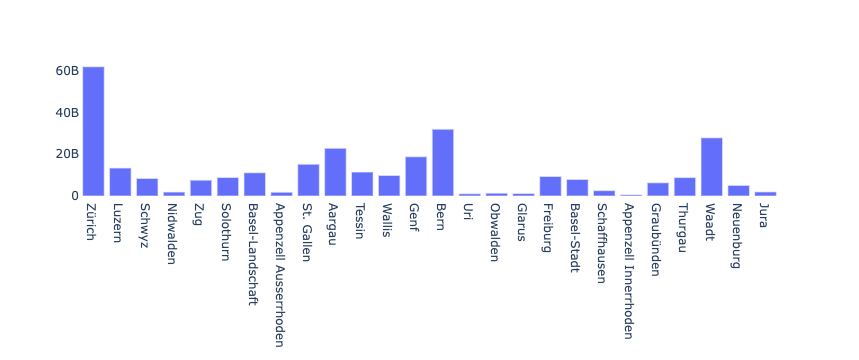

In [28]:
fig = px.bar(x=var_x,
             y=var_y)
layout_helper(fig).show()

### Sorting
With this, we can look at the total taxable income in each canton, but it is a bit unordered and we don't see a quick message.
That's why in the next chart, we will try sorting:

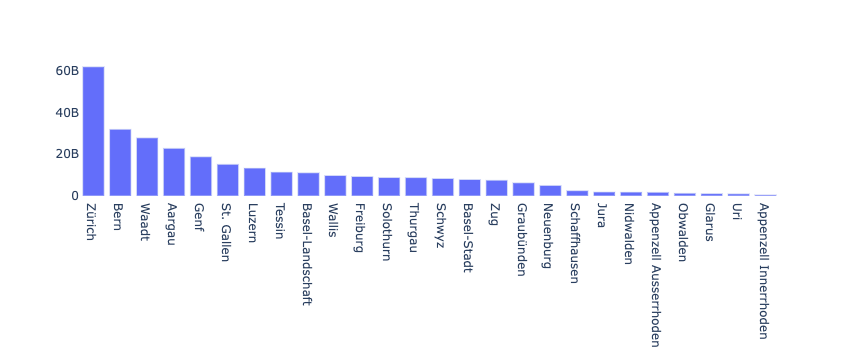

In [29]:
fig = px.bar(x=df.sort_values(by='taxable_income_chf',ascending=False).canton,
             y=df.sort_values(by='taxable_income_chf',ascending=False).taxable_income_chf)
layout_helper(fig).show()

### Vertical labels for better readability
Although vertical bar chart is the most typical one, it is usually better to go for *vertical* bar chart instead, because the horizontal labels are much easier to read.

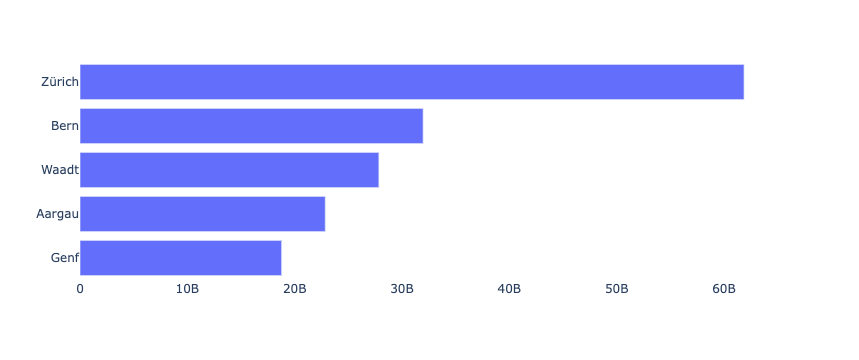

In [30]:
fig = px.bar(y=df.sort_values(by='taxable_income_chf',ascending=True).canton[len(df)-5:],
             x=df.sort_values(by='taxable_income_chf',ascending=True).taxable_income_chf[len(df)-5:],
            orientation='h')
layout_helper(fig).show()

### Add labels and remove the unnecessary
Last, we will add the actual value of the bars directly as label to the bars. Like this, we don't need the x-axis anymore and can set it to invisible:

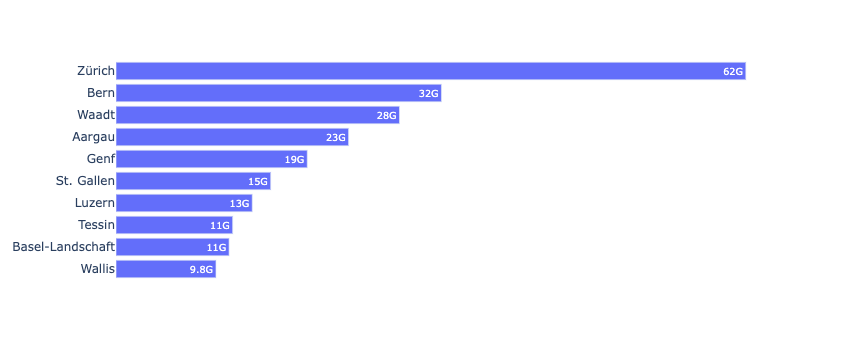

In [62]:
fig = px.bar(y=df.sort_values(by='taxable_income_chf',ascending=True).canton[len(df)-10:],
             x=df.sort_values(by='taxable_income_chf',ascending=True).taxable_income_chf[len(df)-10:],
            orientation='h',
            text_auto='.2s')

# we don't need the xaxis anymore, because we have the labels
fig.update_xaxes(visible=False)

layout_helper(fig).show()

Another chart type is the pie chart, although it is not usually recommended to use it.

## Exercises
Now, we will dig into the *communities* dataset, and we would like you to answer the following questions by choosing an appropriate visualisation type.

1) Which are the top 10 communities by taxable income per capita in the year of 2018?
2) How could you highlight a certain community, say the city of Wollerau, in this chart?
Documentation for specifying color: https://plotly.com/python/discrete-color/

Hint: remove Nan-values from the dataframe first and filter it to the year of interest!

## Solutions

In [40]:
comm = pd.read_csv('data/final/communities.csv')

In [45]:
comm = comm[(comm['year'] == 2018) & ~(comm['taxable_income_per_capita'].isna())]

In [46]:
comm.head()

,community,year,taxable_income_chf,taxable_income_per_capita
3835,Hedingen,2018,161000000.0,96978.0
3837,Flaach,2018,47000000.0,75835.0
3838,Volken,2018,14000000.0,87925.0
3839,Dietlikon,2018,291000000.0,81759.0
3840,Rafz,2018,154000000.0,77516.0


In [55]:
top10_comm = comm.sort_values(by='taxable_income_per_capita',ascending=True).iloc[len(comm)-10:,:]

In [56]:
top10_comm

,community,year,taxable_income_chf,taxable_income_per_capita
21095,Küsnacht (ZH),2018,1.390000e+09,200732.0
14564,Erlenbach (ZH),2018,5.230000e+08,202169.0
21391,Collonge-Bellerive,2018,6.480000e+08,204179.0
10548,Leuggern,2018,2.480000e+08,254883.0
4356,Cologny,2018,5.770000e+08,260821.0
9130,Wollerau,2018,1.088000e+09,290306.0
10442,Feusisberg,2018,7.950000e+08,292442.0
20904,Mies,2018,3.520000e+08,468384.0
10640,Vaux-sur-Morges,2018,6.500000e+07,874743.0
17315,Bedretto,2018,6.400000e+07,959570.0


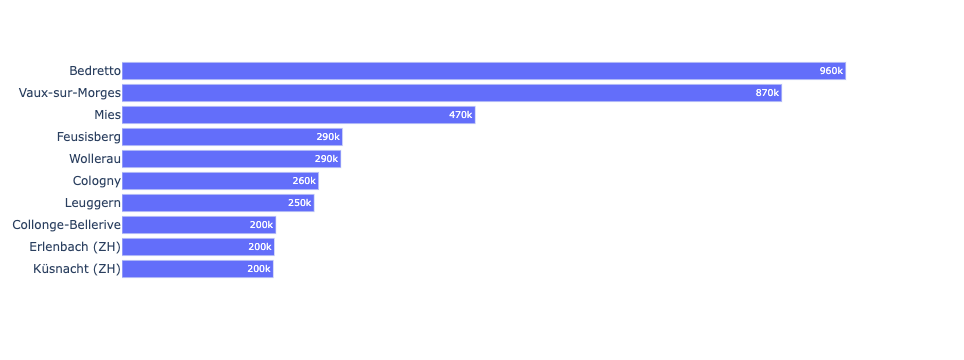

In [63]:
fig = px.bar(y=top10_comm.community,
             x=top10_comm.taxable_income_per_capita,
            orientation='h',
            text_auto='.2s')

# we don't need the xaxis anymore, because we have the labels
fig.update_xaxes(visible=False)

layout_helper(fig).show()

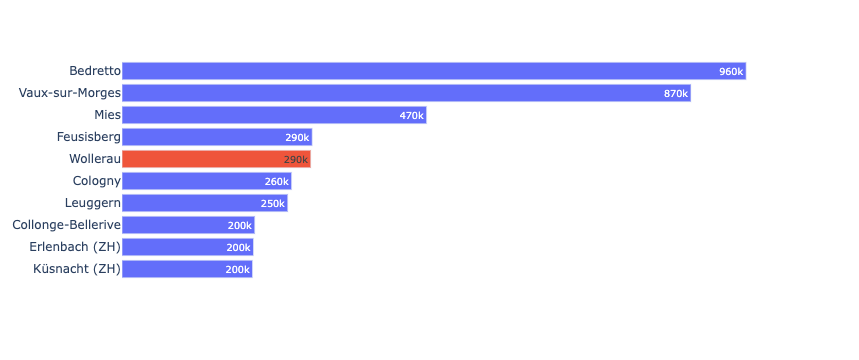

In [64]:
fig = px.bar(y=top10_comm.community,
             x=top10_comm.taxable_income_per_capita,
            orientation='h',
            text_auto='.2s',
            color = (top10_comm.community == 'Wollerau'))

# we don't need the xaxis anymore, because we have the labels
fig.update_xaxes(visible=False)

# to re-create the order
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# to remove color legend
fig.update_traces(showlegend=False)

layout_helper(fig).show()